**THIS IS NOT FINANCIAL ADVICE. DO YOUR OWN RESEARCH. USE AT YOUR OWN RISK.**

# Chapter 1: Prices

Based on [Analyzing Financial Data and Implementing Financial Models Using R](https://www.amazon.com/Analyzing-Financial-Implementing-Springer-Economics/dp/3030641546) by Clifford S. Ang (Springer), but we're using Python instead of R. Also, this notebook is based on the first edition. There's a newer second edition of the book but I don't have it.

In [1]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf

# Cache API calls
import requests_cache

# Standard plots
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Candlestick plots
import mplfinance as mpf

In [2]:
# FIXME Temporarily pinning pandas to 1.3.5 since 1.4.0 breaks Ticker.history() in yfinance 0.1.69.
# See https://github.com/ranaroussi/yfinance/issues/937. After yfinance updates this, we can remove
# the pandas version pin.
pd.__version__

'1.3.5'

In [3]:
yf.__version__

'0.1.69'

## 1 Init tickers (yfinance)

See the yfinance [docs](https://aroussi.com/post/python-yahoo-finance) and [GitHub repo](https://github.com/ranaroussi/yfinance) for more information.

In [4]:
session = requests_cache.CachedSession("yfinance.cache")
session.headers["User-Agent"] = "prices-notebook/1.0"

In [5]:
# Indices
dji = yf.Ticker("^DJI", session=session)         # Dow Jones Industrial Average
gspc = yf.Ticker("^GSPC", session=session)       # S&P 500
ixic = yf.Ticker("^IXIC", session=session)       # NASDAQ Composite

# Equities
aapl = yf.Ticker("AAPL", session=session)        # Apple
amzn = yf.Ticker("AMZN", session=session)        # Amazon
fb = yf.Ticker("FB", session=session)            # Meta (Facebook)
goog = yf.Ticker("GOOG", session=session)        # Alphabet (Google)
msft = yf.Ticker("MSFT", session=session)        # Microsoft
tsla = yf.Ticker("TSLA", session=session)        # Tesla

# Cryptocurrency
btc_usd = yf.Ticker("BTC-USD", session=session)  # Bitcoin/USD

In [6]:
# Preload full histories.
# We use these to maximize MA ranges where we calculate them explicitly.
# We can of course pull down less data if we like.
amzn_df = amzn.history(period="max")
msft_df = msft.history(period="max")

## 2 Plot data (mplfinance)

In [7]:
start = "2021-10-01"
end = "2021-12-31"

### 2.1 Candlestick (OHLC) charts 

In [8]:
def plot_candlestick(ticker, start, end):
    df = ticker.history(start=start, end=end)
    mpf.plot(
        df,
        type="candle",
        title=f"{ticker.info['shortName']} ({ticker.info['symbol']})\n{start} to {end}",
        ylabel="Price ($)",
        volume=True,
        ylabel_lower="Volume",
        show_nontrading=False,
        mav=(4),
        figratio=(12, 6),
        style="yahoo")

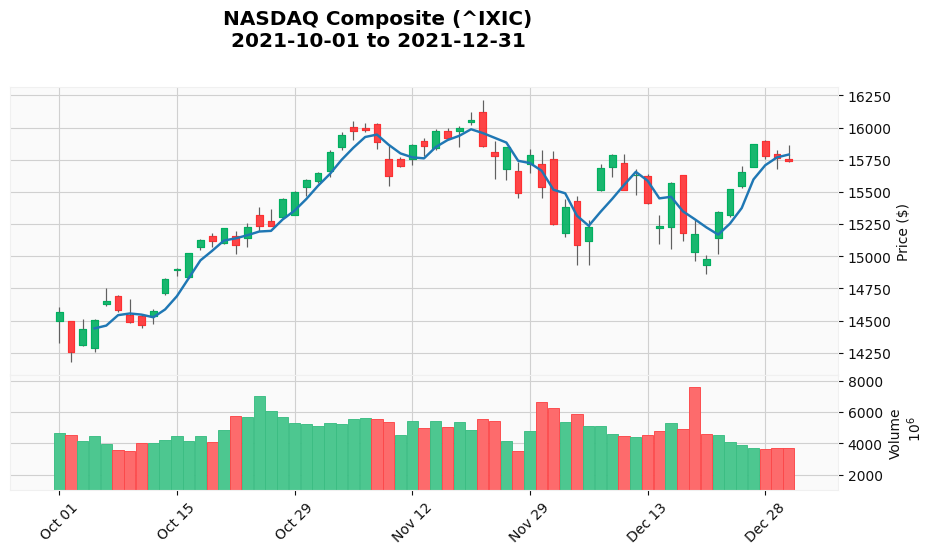

In [9]:
plot_candlestick(ixic, start, end)

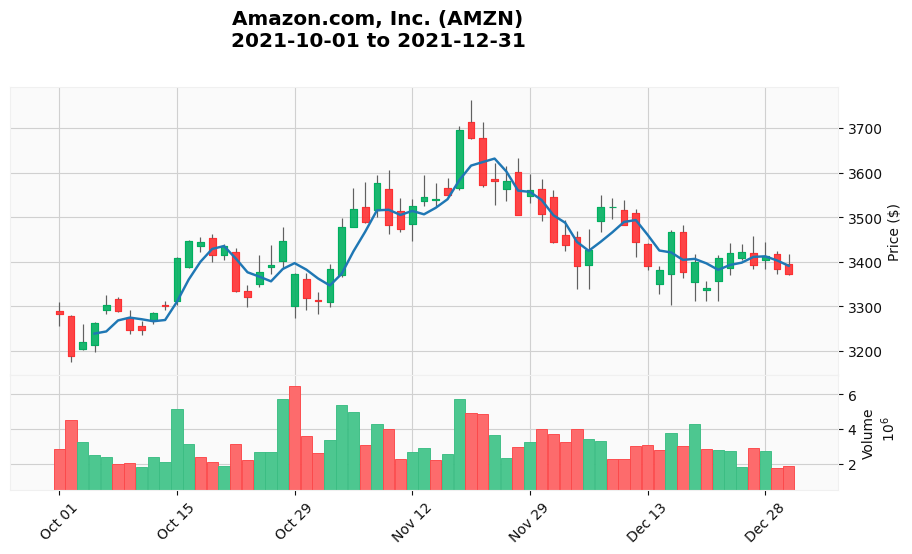

In [10]:
plot_candlestick(amzn, start, end)

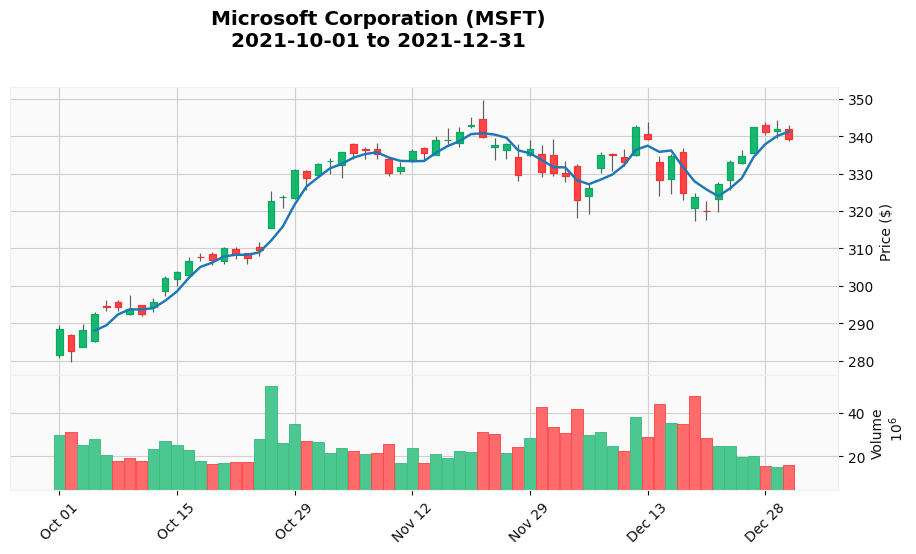

In [11]:
plot_candlestick(msft, start, end)

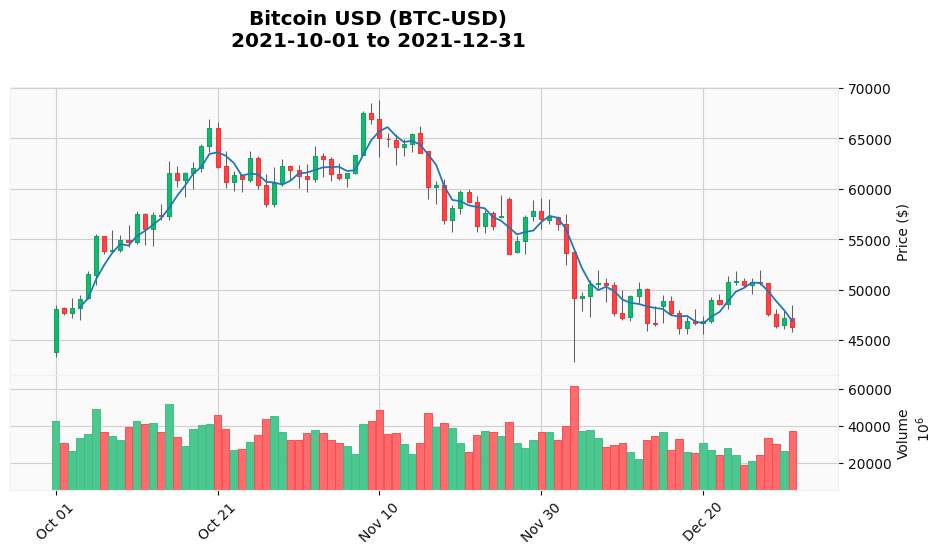

In [12]:
plot_candlestick(btc_usd, start, end)

### 2.2 Capital appreciation 

In [13]:
comb_df = pd.DataFrame({
    "^IXIC": ixic.history(start=start, end=end)["Close"],
    "AAPL": aapl.history(start=start, end=end)["Close"],
    "AMZN": amzn.history(start=start, end=end)["Close"],
    "FB": fb.history(start=start, end=end)["Close"],
    "GOOG": goog.history(start=start, end=end)["Close"],
    "MSFT": msft.history(start=start, end=end)["Close"],
    "TSLA": tsla.history(start=start, end=end)["Close"],
})
comb_df.head()

,^IXIC,AAPL,AMZN,FB,GOOG,MSFT,TSLA
Date,,,,,,,
2021-10-01,14566.700195,142.442108,3283.260010,343.010010,2729.250000,288.572052,775.219971
2021-10-04,14255.480469,138.937225,3189.780029,326.230011,2675.300049,282.592987,781.530029
2021-10-05,14433.830078,140.904358,3221.000000,332.959991,2723.540039,288.232697,780.590027
2021-10-06,14501.910156,141.793060,3262.010010,333.640015,2747.080078,292.574707,782.750000
2021-10-07,14654.019531,143.081177,3302.429932,329.220001,2783.709961,294.311554,793.609985


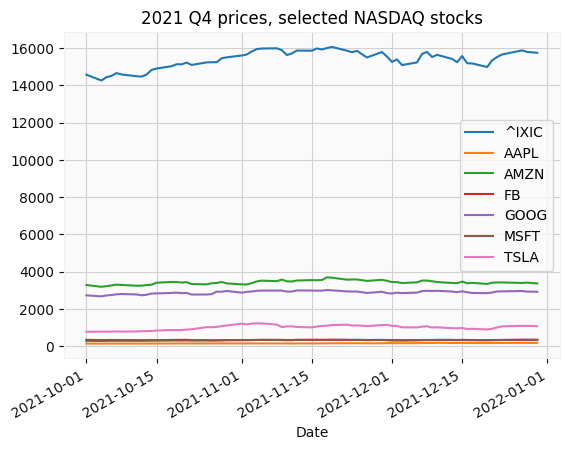

In [14]:
comb_df.plot(title="2021 Q4 prices, selected NASDAQ stocks")
plt.show()

In [15]:
# Normalize to show price action for $1
norm_df = comb_df.div(comb_df.iloc[0])
norm_df.head()

,^IXIC,AAPL,AMZN,FB,GOOG,MSFT,TSLA
Date,,,,,,,
2021-10-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-10-04,0.978635,0.975394,0.971528,0.951080,0.980233,0.979281,1.008140
2021-10-05,0.990879,0.989204,0.981037,0.970701,0.997908,0.998824,1.006927
2021-10-06,0.995552,0.995443,0.993528,0.972683,1.006533,1.013871,1.009713
2021-10-07,1.005994,1.004487,1.005839,0.959797,1.019954,1.019889,1.023722


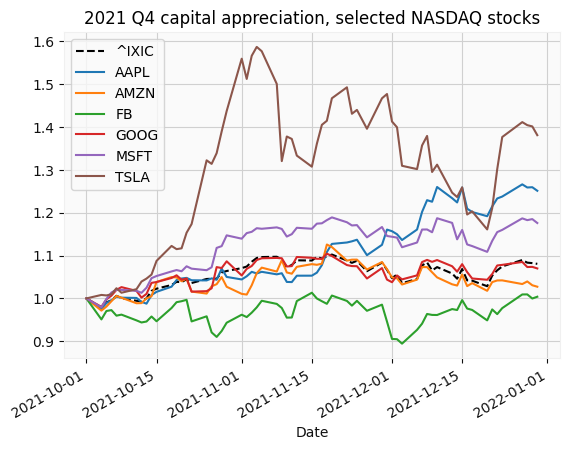

In [16]:
norm_df.plot(title="2021 Q4 capital appreciation, selected NASDAQ stocks", style=['k--'])
plt.show()

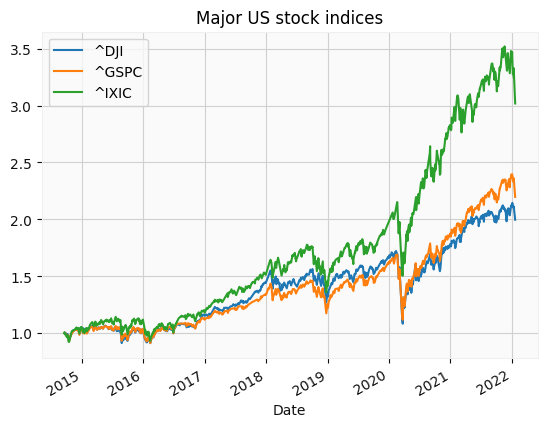

In [17]:
start2 = "2014-09-17"
end2 = "2022-01-23"

comb2_df = pd.DataFrame({
    "^DJI": dji.history(start=start2, end=end2)["Close"],
    "^GSPC": gspc.history(start=start2, end=end2)["Close"],
    "^IXIC": ixic.history(start=start2, end=end2)["Close"],
})

norm2_df = comb2_df.div(comb2_df.iloc[0])
norm2_df.plot(title="Major US stock indices")
plt.show()

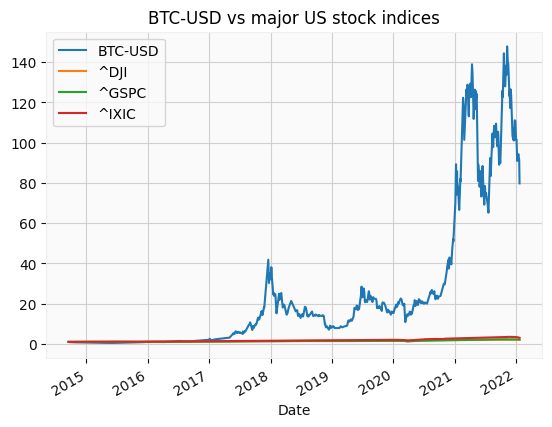

In [18]:
start3 = "2014-09-17"
end3 = "2022-01-23"

comb3_df = pd.DataFrame({
    "BTC-USD": btc_usd.history(start=start3, end=end3)["Close"],
    "^DJI": dji.history(start=start3, end=end3)["Close"],
    "^GSPC": gspc.history(start=start3, end=end3)["Close"],
    "^IXIC": ixic.history(start=start3, end=end3)["Close"],
})

# Remove rows where stocks aren't trading. Bitcoin always trades,
# so we don't want to accidentally grab a row 0 NaN for normalizing.
comb3_df = comb3_df[
    (comb3_df["^DJI"].notnull()) &
    (comb3_df["^GSPC"].notnull()) &
    (comb3_df["^IXIC"].notnull()) &
    (comb3_df["BTC-USD"].notnull())
]

norm3_df = comb3_df.div(comb3_df.iloc[0])
norm3_df.plot(title="BTC-USD vs major US stock indices")
plt.show()

## 3 Technical analysis 

### 3.1 Trend: Simple Moving Average Crossover 

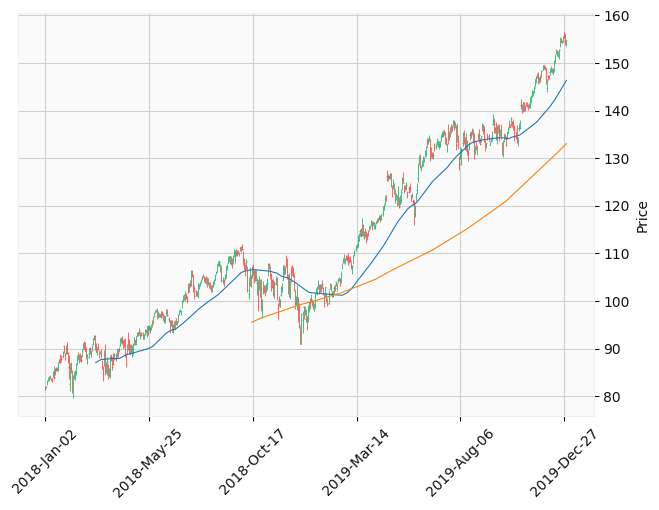

In [19]:
# Using mplfinance
df = msft_df["2018-01-01":"2019-12-31"]
mpf.plot(df, mav=(50, 200), style="yahoo")

In [20]:
def plot_crossover(ticker, df):
    df[["Close", "SMA_50", "SMA_200"]].plot(
        title=f"{ticker.info['symbol']}: SMA Crossover",
        style=["-", "-", "--"])

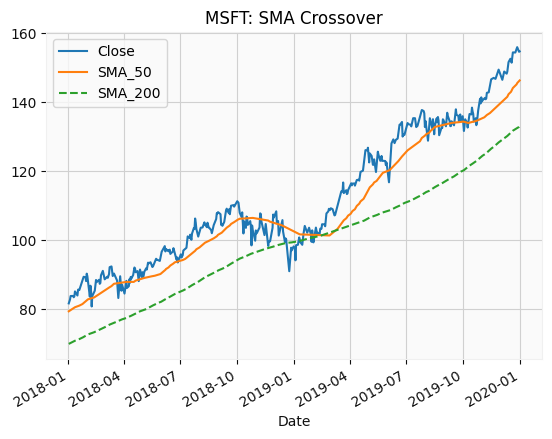

In [21]:
msft_df["SMA_50"] = msft_df["Close"].rolling(50).mean()
msft_df["SMA_200"] = msft_df["Close"].rolling(200).mean()
plot_crossover(msft, msft_df["2018-01-01":"2019-12-31"])

### 3.2 Volatility: Bollinger Bands

In [22]:
def add_bollinger_bands(df):
    sma_20 = df["Close"].rolling(20)
    mean = sma_20.mean()
    two_sigmas = 2 * sma_20.std()

    df["SMA_20"] = mean
    df["UpperBB"] = mean + two_sigmas
    df["LowerBB"] = mean - two_sigmas

    
def plot_bollinger(ticker, df):
    df[["Close", "SMA_20", "UpperBB", "LowerBB"]] \
        .plot(title=f"{ticker.info['symbol']} with Bollinger Bands", style=["-", "--", "-", "-"])

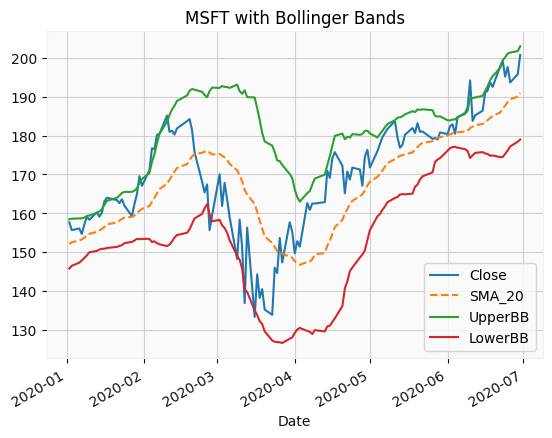

In [23]:
add_bollinger_bands(msft_df)
plot_bollinger(msft, msft_df["2020-01-01":"2020-06-30"])

### 3.3 Momentum: Relative Strength Index (RSI)

See [Relative Strength Index (RSI)](https://www.investopedia.com/terms/r/rsi.asp) (Investopedia).

In [24]:
# https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/
def add_rsi(df, periods=14):
    close_diff = df["Close"].diff()
    up = close_diff.clip(lower=0)
    down = -1 * close_diff.clip(upper=0)

    ma_up = up.ewm(com=periods-1, adjust=True, min_periods=periods).mean()
    ma_down = down.ewm(com=periods-1, adjust=True, min_periods=periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100 / (1 + rsi))
    df["RSI"] = rsi


def plot_rsi(df, symbol, periods=14):
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, tight_layout=True, figsize=(9, 6))

    ax[0].set_title(f"{symbol} price")
    ax[0].plot(df["Close"])

    ax[1].set_title(f"RSI ({periods}-day moving average)")
    ax[1].set_ylim(0, 100)
    ax[1].plot(df["RSI"])
    ax[1].axhline(70, color="r", ls="--")
    ax[1].axhline(30, color="g", ls="--")

    custom_lines = [
        Line2D([0], [0], color="r", lw=4),
        Line2D([0], [0], color="g", lw=4)
    ]
    ax[1].legend(custom_lines, ["Overbought", "Oversold"], loc="best")

#### 3.3.1 AMZN 

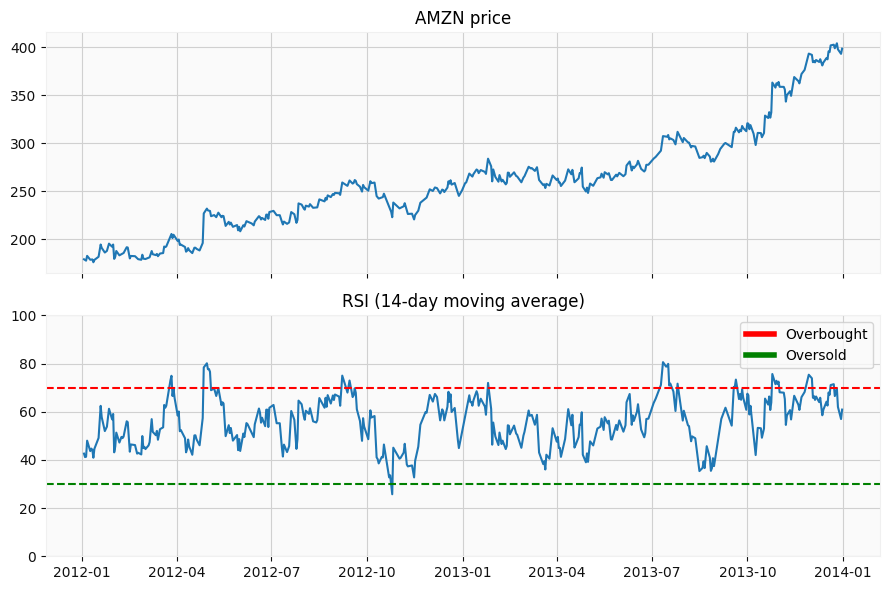

In [25]:
add_rsi(amzn_df)

# This one's from the book
plot_rsi(amzn_df["2012-01-01":"2013-12-31"], "AMZN")

#### 3.3.2 MSFT 

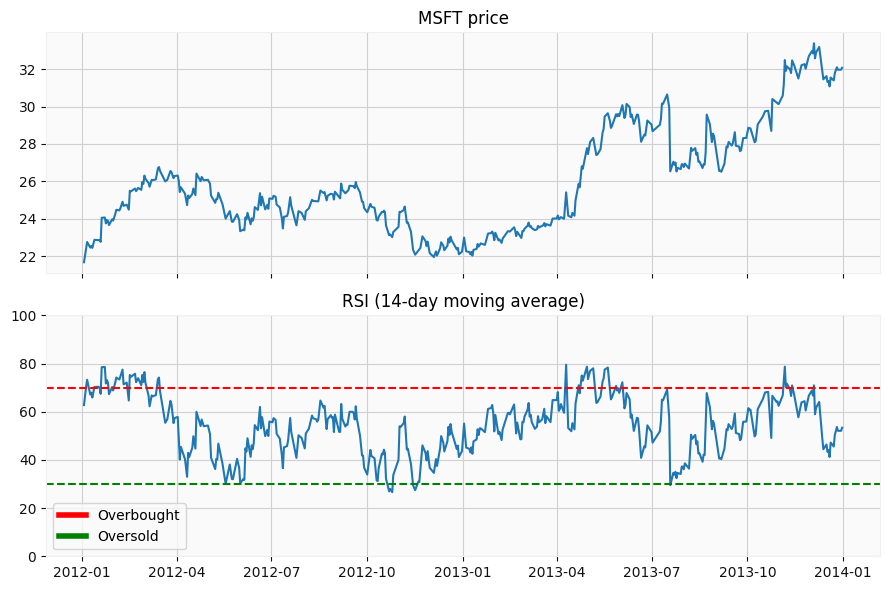

In [26]:
add_rsi(msft_df)

# MSFT, same time range as above
plot_rsi(msft_df["2012-01-01":"2013-12-31"], "MSFT")

### 3.4 Momentum: Moving Average Convergence Divergence (MACD)

See [Moving Average Convergence Divergence (MACD)](https://www.investopedia.com/terms/m/macd.asp) (Investopedia).

#### 3.4.1 By hand 

In [27]:
def add_macd(df):
    ema_12 = df["Close"].ewm(span=12, adjust=False, min_periods=12).mean()
    ema_26 = df["Close"].ewm(span=26, adjust=False, min_periods=26).mean()
    macd = ema_12 - ema_26
    signal = macd.ewm(span=9, adjust=False, min_periods=9).mean()
    diff = macd - signal
    
    df["MACD"] = macd
    df["MACD-s"] = signal
    df["MACD-h"] = diff
    

def plot_macd(df, symbol, periods=14):
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, tight_layout=True, figsize=(9, 6))

    ax[0].set_title(f"{symbol} price")
    ax[0].plot(df["Close"])

    ax[1].set_title(f"MACD")
    ax[1].plot(df["MACD"], color="gray") # slow signal
    ax[1].plot(df["MACD-s"], color="orange") # fast signal
    ax[1].bar(df.index, height=df["MACD-h"], color="black") # diff

    custom_lines = [
        Line2D([0], [0], color="gray", lw=4),
        Line2D([0], [0], color="orange", lw=4),
        Line2D([0], [0], color="black", lw=4)
    ]
    ax[1].legend(custom_lines, ["MACD", "Signal", "Diff"], loc="best")

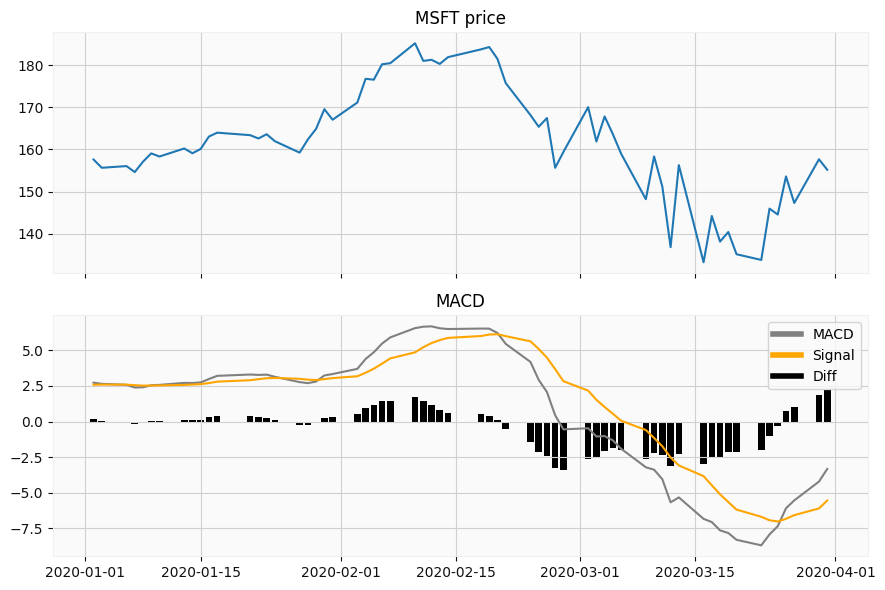

In [28]:
add_macd(msft_df)
plot_macd(msft_df["2020-01-01":"2020-03-31"], "MSFT")

#### 3.4.2 Using pandas-ta 

In [29]:
msft_macd = msft_df.ta.macd(close="Close", fast=12, slow=26, signal=9, append=True)
msft_macd.tail(10)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2022-01-07,-2.631203,-2.717128,0.085925
2022-01-10,-3.429506,-2.812345,-0.617161
2022-01-11,-3.959234,-2.673659,-1.285576
2022-01-12,-4.066696,-2.224896,-1.841800
2022-01-13,-5.179075,-2.669821,-2.509255
2022-01-14,-5.560806,-2.441241,-3.119565
2022-01-18,-6.398792,-2.623382,-3.775410
2022-01-19,-6.928169,-2.522207,-4.405962
2022-01-20,-7.401973,-2.396809,-5.005164


In [30]:
msft_macd.rename(columns={
    "MACD_12_26_9": "MACD",
    "MACDh_12_26_9": "MACD-h",
    "MACDs_12_26_9": "MACD-s",    
}, inplace=True)

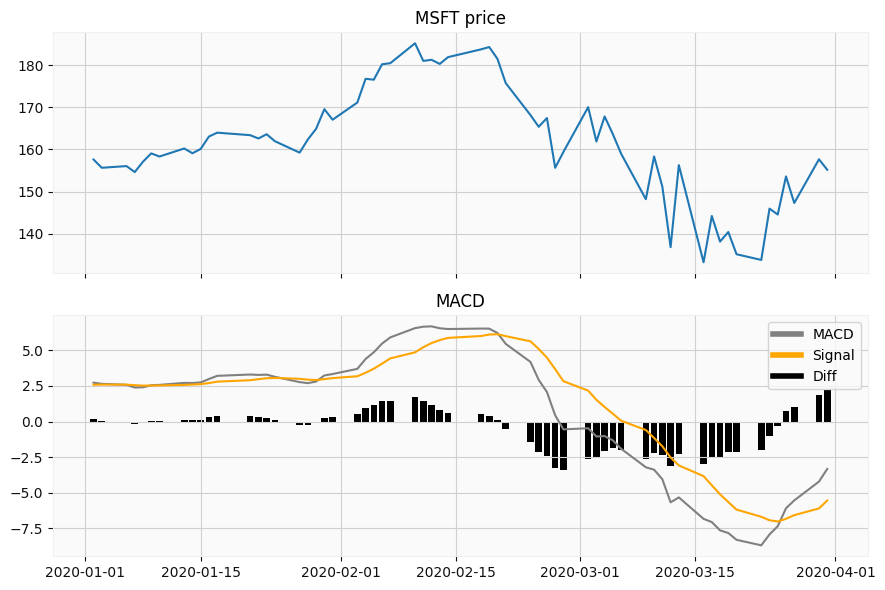

In [31]:
plot_macd(msft_df["2020-01-01":"2020-03-31"], "MSFT")